In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/Covid_Data/owid-covid-data (1).csv")
df2 = pd.read_csv("/content/drive/Shareddrives/Covid_Data/Worldwide Vaccine Data.csv")

In [ ]:
df['pop_vax_rate'] = df['people_vaccinated'] / df['population'] * 100
df['death_rate'] = df['total_deaths'] / df['total_cases'] * 100

In [ ]:
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
163568      ZWE    Africa     Zimbabwe  2022-02-17     232598.0      385.0   
163569      ZWE    Africa     Zimbabwe  2022-02-18     233030.0      432.0   
163570      ZWE    Africa     Zimbabwe  2022-02-19     233224.0      194.0   
163571      ZWE    Africa     Zimbabwe  2022-02-20     233352.0      128.0   
163572      ZWE    Africa     Zimbabwe  2022-02-21     233571.0      219.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [ ]:
df2.head()

,Country,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated
0,Afghanistan,14,5321308,12.0,11.0
1,Albania,94,2669695,44.0,41.0
2,Algeria,31,13461201,17.0,14.0
3,Angola,49,15505389,32.0,16.0
4,Argentina,204,91698060,89.0,79.0


In [ ]:
df_conBar = df[df['date'] == '2022-02-11']
df_conBar = df_conBar.groupby('continent').mean()
df_conBar

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,pop_vax_rate,death_rate
continent,,,,,,,,,,,,,,,,,,,,,
Africa,2.011188e+05,292.618182,307.729873,4508.851852,6.407407,8.140296,22950.264600,38.119527,40.095127,296.286204,...,25.155273,1.505500,64.412909,0.560736,NaN,NaN,NaN,NaN,30.342653,1.892192
Asia,2.242594e+06,12010.312500,12421.357083,28109.255319,44.404255,46.310064,73740.113479,656.932229,676.369937,584.355894,...,71.172920,2.905349,74.797708,0.739891,NaN,NaN,NaN,NaN,69.412917,1.765462
Europe,2.937027e+06,25354.387755,26925.725980,34582.375000,77.895833,71.630958,242452.638082,2576.067755,2373.289265,2170.841458,...,93.954000,5.164605,79.779167,0.879881,NaN,NaN,NaN,NaN,71.412987,1.098640
North America,2.679006e+06,7895.117647,6803.487353,39315.382353,111.882353,86.987500,125278.283824,396.421912,554.839824,1161.807353,...,77.541308,2.316522,76.599714,0.755957,NaN,NaN,NaN,NaN,61.960138,1.370044
Oceania,1.935858e+05,1659.000000,1726.151750,637.363636,6.727273,5.805182,46308.602625,1073.043625,991.322563,471.783273,...,47.867000,2.768750,73.776250,0.714083,NaN,NaN,NaN,NaN,84.906355,2.047866
South America,3.975748e+06,20488.384615,18291.670308,102925.083333,173.083333,140.523667,103750.668000,709.400000,579.119385,2394.577833,...,65.990667,2.068333,75.579231,0.763167,NaN,NaN,NaN,NaN,74.875756,2.418207


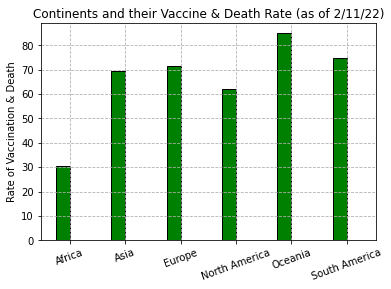

In [ ]:
r = np.arange(len(df_conBar))
width = 0.25

plt.bar(r, df_conBar.pop_vax_rate, color = 'g',
		width = width, edgecolor = 'black',
		label='Vaccination Rate')
plt.bar(r + width, df_conBar.death_rate, color = 'r',
		width = width, edgecolor = 'black',
		label='Death Rate')

plt.xlabel("")
plt.ylabel("Rate of Vaccination & Death")
plt.title("Continents and their Vaccine & Death Rate (as of 2/11/22)")

plt.grid(linestyle='--')
plt.xticks(r + width/2, ['Africa','Asia','Europe','North America', 'Oceania', 'South America'], rotation=20)

#plt.legend()
plt.show()

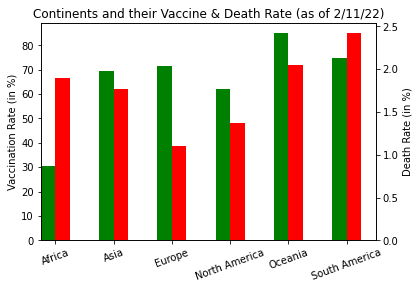

In [ ]:
width = 0.25

fig = plt.figure()

ax = fig.add_subplot()
ax2 = ax.twinx() 

df_conBar.pop_vax_rate.plot(kind='bar', color='green', ax=ax, width=width, position=1, rot=20,
                            title="Continents and their Vaccine & Death Rate (as of 2/11/22)")
df_conBar.death_rate.plot(kind='bar', color='red', ax=ax2, width=width, position=0, rot=20)

ax.set_xlabel('')
ax.set_ylabel('Vaccination Rate (in %)')
ax2.set_ylabel('Death Rate (in %)')

plt.show()

In [ ]:
df[df['date'] == '2022-02-11'].to_csv('/content/drive/MyDrive/covid_data_2-11.csv')